# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates

In [2]:
data = pd.read_csv('/kaggle/input/rental-prices-dataset-wroclaw-2007-2023/city_rentals.csv', parse_dates=[27])

# Data overview

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,33885.0,2365.734307,1288.025315,100.000000,1700.000,2100.000000,2600.000000,19900.000000
size,33885.0,53.130228,21.590245,5.000000,40.000,50.000000,60.000000,450.000000
price/size,33885.0,46.128491,16.986865,1.851852,34.375,43.269231,54.347826,207.317073
balcony,33885.0,0.506920,0.499959,0.000000,0.000,1.000000,1.000000,1.000000
juliet_balcony,33885.0,0.003128,0.055844,0.000000,0.000,0.000000,0.000000,1.000000
basement,33885.0,0.181791,0.385678,0.000000,0.000,0.000000,0.000000,1.000000
tarrace,33885.0,0.070090,0.255302,0.000000,0.000,0.000000,0.000000,1.000000
loggia,33885.0,0.018740,0.135607,0.000000,0.000,0.000000,0.000000,1.000000
yard,33885.0,0.021809,0.146062,0.000000,0.000,0.000000,0.000000,1.000000
attic,33885.0,0.005253,0.072288,0.000000,0.000,0.000000,0.000000,1.000000


In [4]:
data.dtypes

price                            int64
size                           float64
price/size                     float64
balcony                          int64
juliet_balcony                   int64
basement                         int64
tarrace                          int64
loggia                           int64
yard                             int64
attic                            int64
floor                          float64
rooms                          float64
bathrooms                      float64
state                           object
building_type                   object
built_year                     float64
elevator                       float64
furnished                      float64
kichen_separate                  int64
kichen_kichenette                int64
kichen_window                  float64
separate_toilet_room             int64
shower                         float64
bathtub                        float64
bidet                            int64
bathroom_window          

## Percent of Null values in columns

In [5]:
print('Percent of missing values')
(data.isnull().sum() / len(data)) *100

Percent of missing values


price                    0.000000
size                     0.000000
price/size               0.000000
balcony                  0.000000
juliet_balcony           0.000000
basement                 0.000000
tarrace                  0.000000
loggia                   0.000000
yard                     0.000000
attic                    0.000000
floor                    2.824259
rooms                    0.631548
bathrooms               54.339678
state                   38.368009
building_type           72.566032
built_year              43.199056
elevator                58.022724
furnished               44.819242
kichen_separate          0.000000
kichen_kichenette        0.000000
kichen_window           91.046186
separate_toilet_room     0.000000
shower                  98.698539
bathtub                 98.978899
bidet                    0.000000
bathroom_window          0.000000
offering                 0.000000
date_listed              0.000000
street                  18.424081
subdivision   

## Unique values in columns

In [6]:
for col in data:
    print(f'Number of unique values in {col}: {data[col].nunique()}')

Number of unique values in price: 575
Number of unique values in size: 1634
Number of unique values in price/size: 5646
Number of unique values in balcony: 2
Number of unique values in juliet_balcony: 2
Number of unique values in basement: 2
Number of unique values in tarrace: 2
Number of unique values in loggia: 2
Number of unique values in yard: 2
Number of unique values in attic: 2
Number of unique values in floor: 40
Number of unique values in rooms: 17
Number of unique values in bathrooms: 5
Number of unique values in state: 8
Number of unique values in building_type: 5
Number of unique values in built_year: 144
Number of unique values in elevator: 1
Number of unique values in furnished: 2
Number of unique values in kichen_separate: 2
Number of unique values in kichen_kichenette: 2
Number of unique values in kichen_window: 2
Number of unique values in separate_toilet_room: 2
Number of unique values in shower: 1
Number of unique values in bathtub: 1
Number of unique values in bidet

# Visualization

In [7]:
# Set global figure size
plt.rcParams["figure.figsize"] = [24, 8]
sns.set_style("darkgrid")

## Price/Size

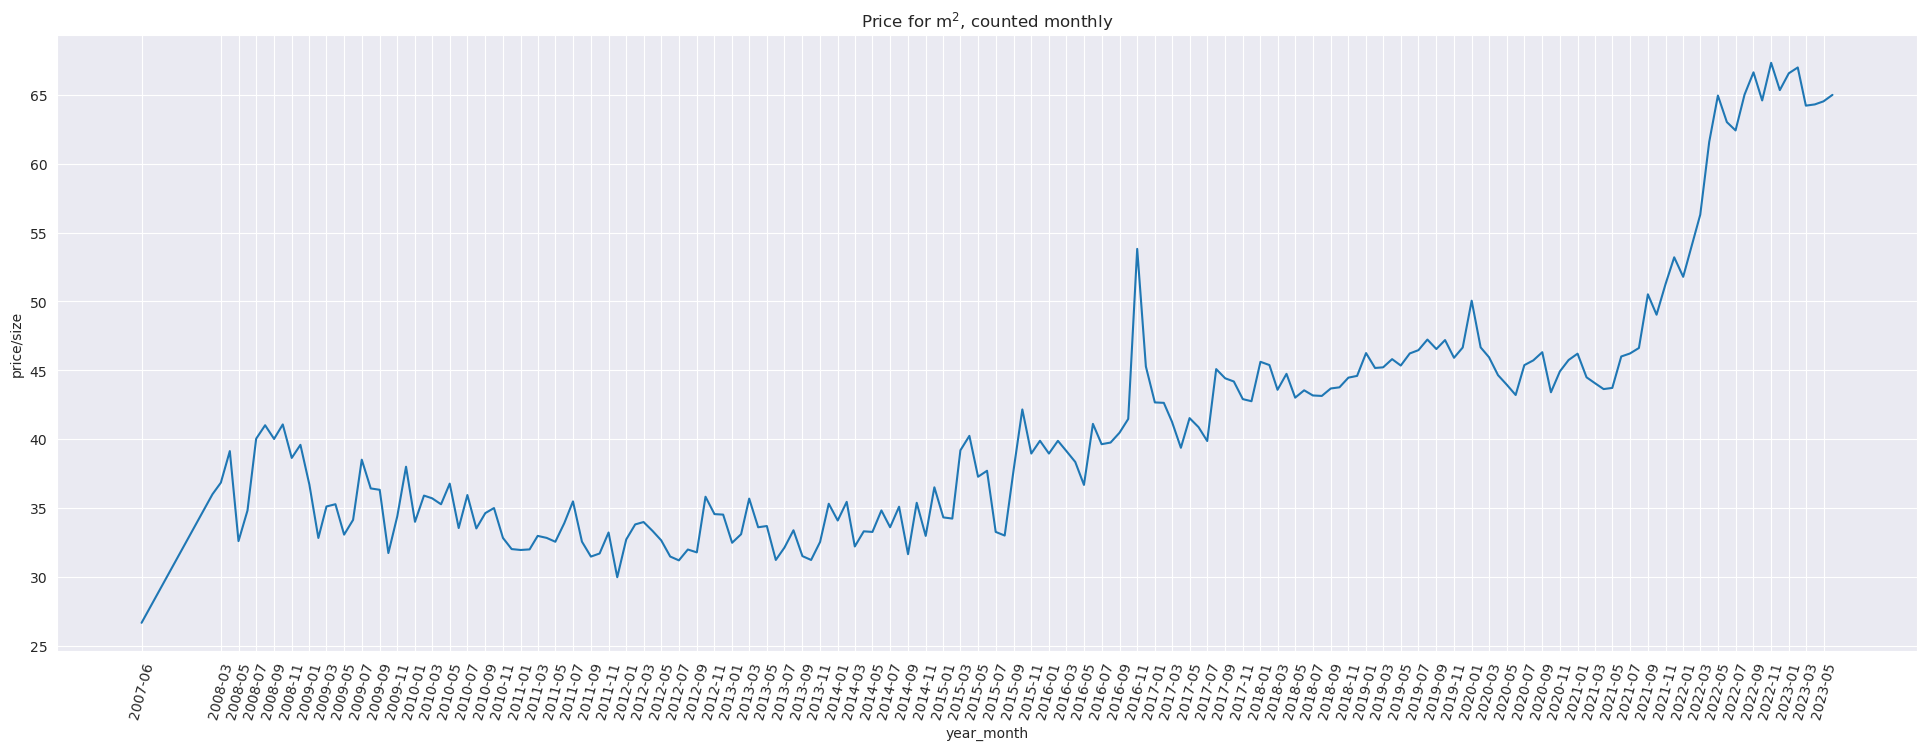

<Figure size 3400x1000 with 0 Axes>

In [8]:
# Calculate the mean price/size for every month
data['year_month'] = data['date_listed'].dt.to_period('M')
lineplot_data = data.groupby('year_month')['price/size'].mean().reset_index()
lineplot_data['year_month'] = lineplot_data['year_month'].dt.to_timestamp()

plot = sns.lineplot(lineplot_data, x='year_month', y='price/size')
plot.set(xticks=lineplot_data.year_month.values[lineplot_data.index % 2 == 0]) # Skipping every second month for the x axis
plot.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
plot.tick_params(axis='x', labelrotation=75)
plt.title('Price for m$^2$, counted monthly')
plt.figure(figsize=(34,10))
plt.show()

#### Some observations:
#### There is a significant data gap between June 2007 and February 2008.
#### Noticeable spikes in the data may be due to limited data availability during those months. The surge towards the end of 2016 can be attributed to a higher number of expensive rentals.
#### The dramatic increase starting in 2021 is clearly evident.

## Count of values in some of the columns

<Axes: xlabel='furnished', ylabel='count'>

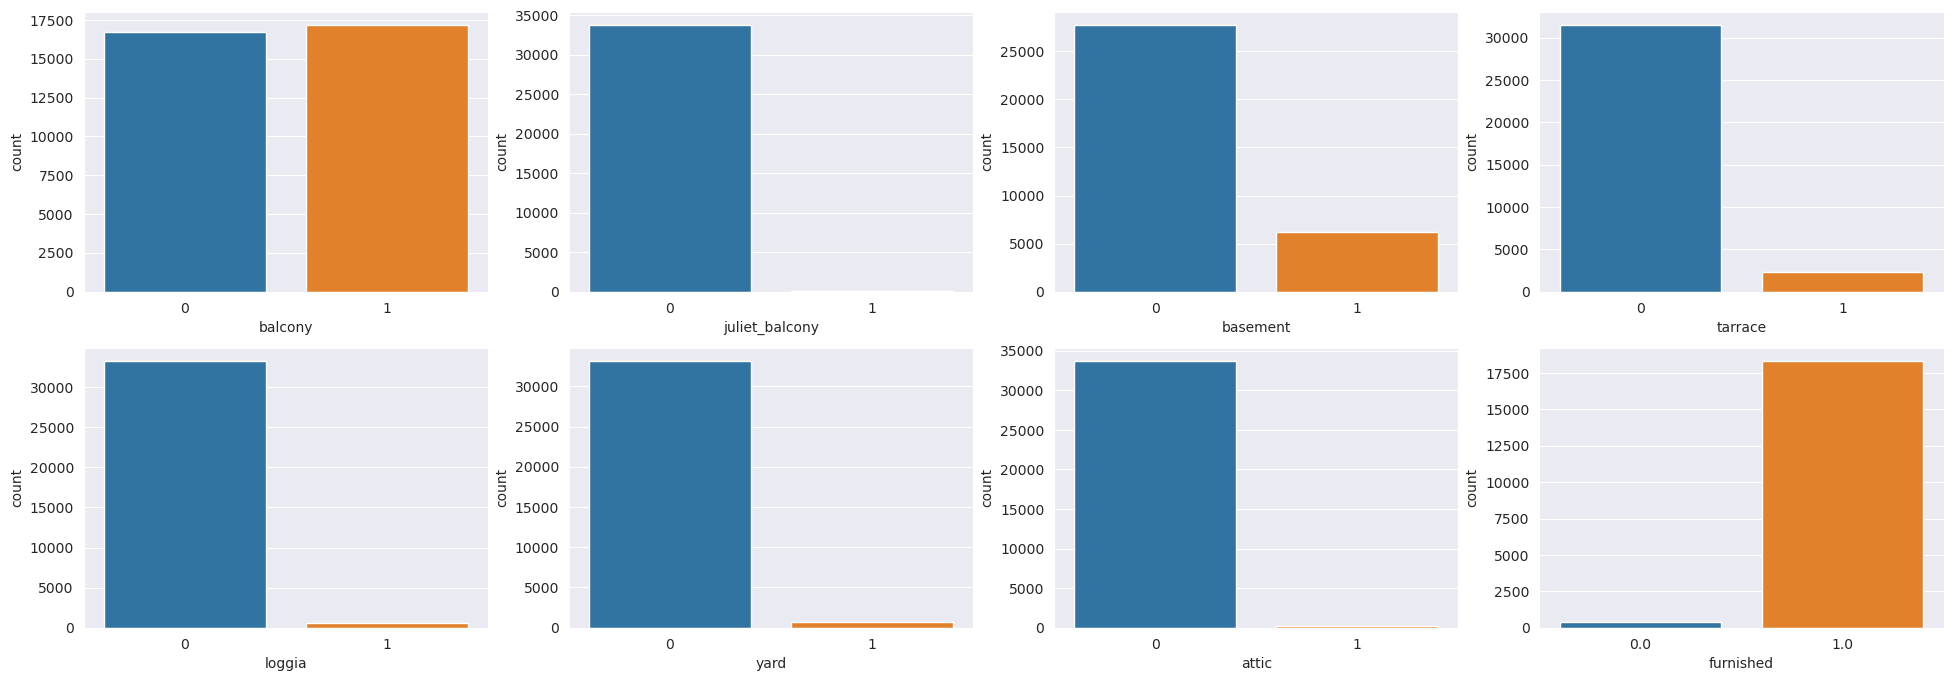

In [9]:
fig, ax = plt.subplots(2, 4)
sns.countplot(data=data, x='balcony', ax=ax[0, 0])
sns.countplot(data=data, x='juliet_balcony', ax=ax[0, 1])
sns.countplot(data=data, x='basement', ax=ax[0, 2])
sns.countplot(data=data, x='tarrace', ax=ax[0, 3])
sns.countplot(data=data, x='loggia', ax=ax[1, 0])
sns.countplot(data=data, x='yard', ax=ax[1, 1])
sns.countplot(data=data, x='attic', ax=ax[1, 2])
sns.countplot(data=data, x='furnished', ax=ax[1, 3])

(0.0, 1.0, 0.0, 1.0)

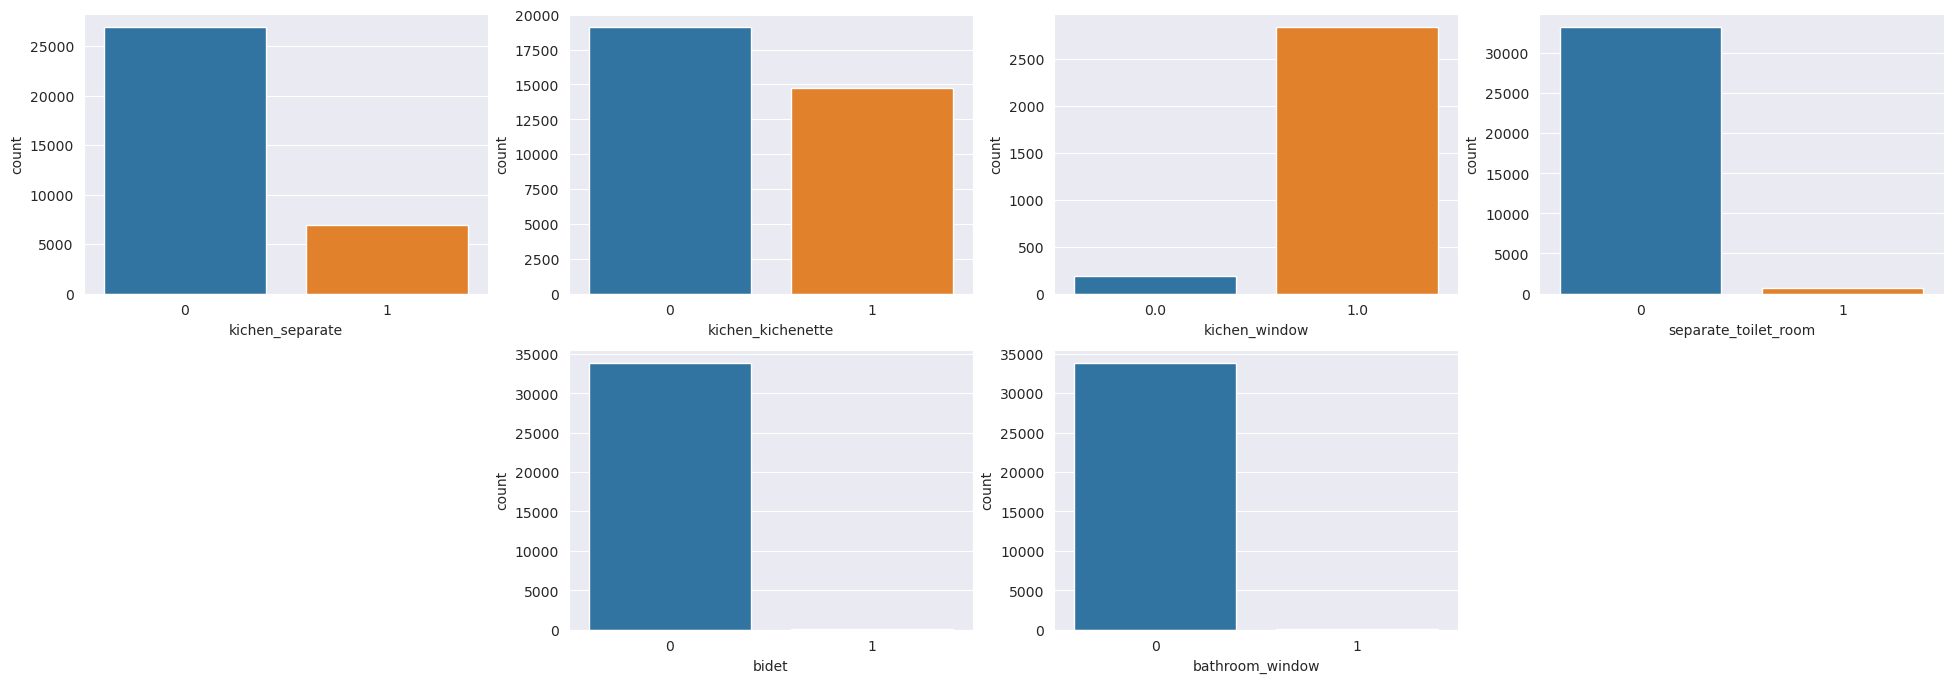

In [10]:
fig, ax = plt.subplots(2, 4)
sns.countplot(data=data, x='kichen_separate', ax=ax[0, 0])
sns.countplot(data=data, x='kichen_kichenette', ax=ax[0, 1])
sns.countplot(data=data, x='kichen_window', ax=ax[0, 2])
sns.countplot(data=data, x='separate_toilet_room', ax=ax[0, 3])
sns.countplot(data=data, x='bidet', ax=ax[1, 1])
sns.countplot(data=data, x='bathroom_window', ax=ax[1, 2])
ax[-1, -4].axis('off')
ax[-1, -1].axis('off')

## Boroughs

Text(0.5, 1.0, 'Price for m$^2$ in Boroughs in 2023')

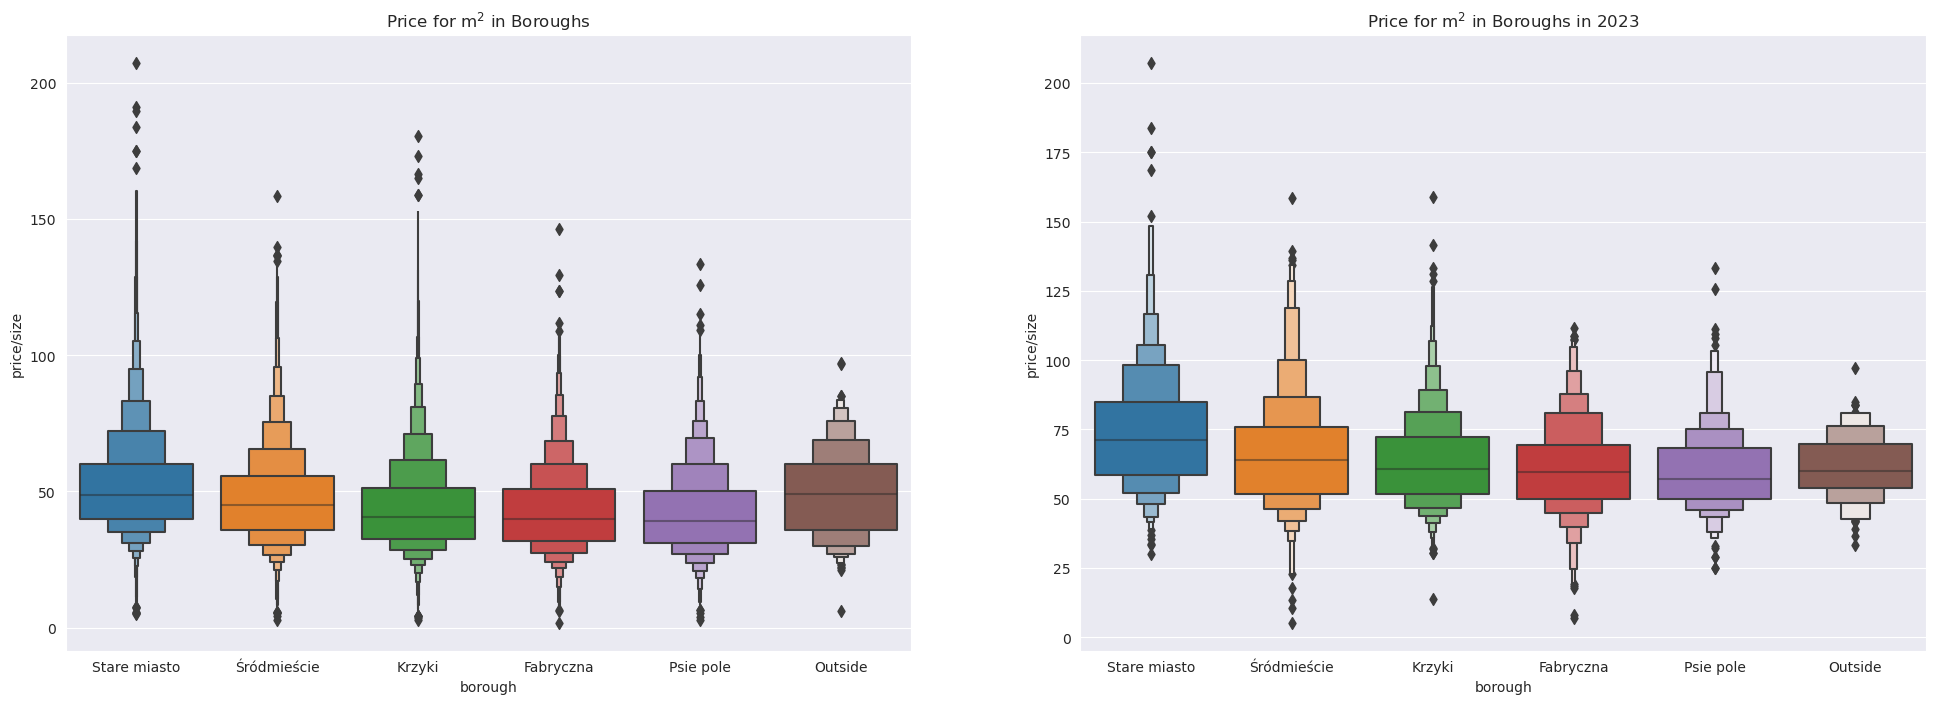

In [11]:
fig, ax = plt.subplots(ncols=2)
sns.boxenplot(data=data, x='borough', y='price/size', ax=ax[0]).set_title('Price for m$^2$ in Boroughs')
sns.boxenplot(data=data.loc[(data['date_listed'] > '2022-12-31')], x='borough', y='price/size', ax=ax[1]).set_title('Price for m$^2$ in Boroughs in 2023')

#### This is unexpected, city center rentals (old town - 'Stare miasto' borough) should be pricier, while those farther away should be cheaper.
#### Unusually high costs for rentals outside the city, but not in 2023, those rentals could simply be more recent then average.

In [12]:
print('Mean price/size for boroughs')
print('------------------------')
print(data[['price/size', 'borough']].groupby('borough').mean())

print('\nMean price/size for boroughs only in 2023')
print('------------------------')
print(data.loc[(data['date_listed'] > '2022-12-31')][['price/size', 'borough']].groupby('borough').mean())

Mean price/size for boroughs
------------------------
              price/size
borough                 
Fabryczna      42.753079
Krzyki         43.730521
Outside        49.346072
Psie pole      42.103454
Stare miasto   52.241095
Śródmieście    47.565472

Mean price/size for boroughs only in 2023
------------------------
              price/size
borough                 
Fabryczna      60.956821
Krzyki         63.234616
Outside        61.574265
Psie pole      59.957668
Stare miasto   74.044886
Śródmieście    66.209214


In [13]:
print('Mean date_listed for the Outside value')
print('------------------------')
outside_year = data.query('borough == "Outside"')
outside_year = outside_year['date_listed'].mean()
print(f'{outside_year.year}-{outside_year.month}')

print('\nMean date_listed for all but the Outside value')
print('------------------------')
borough_year = data.query('borough != "Outside"')
borough_year = borough_year['date_listed'].mean()
print(f'{borough_year.year}-{borough_year.month}')

Mean date_listed for the Outside value
------------------------
2020-11

Mean date_listed for all but the Outside value
------------------------
2018-9


#### On average, property listings outside the city are 2 years younger.

## Shower and Bath

In [14]:
print('------------------------')
print(f'Number of rentals having a bath and a shower: {data.query("shower == 1 & bathtub == 1").shape[0]}')

------------------------
Number of rentals having a bath and a shower: 103


Text(0.5, 1.0, 'Price for m$^2$ for rentals having a shower')

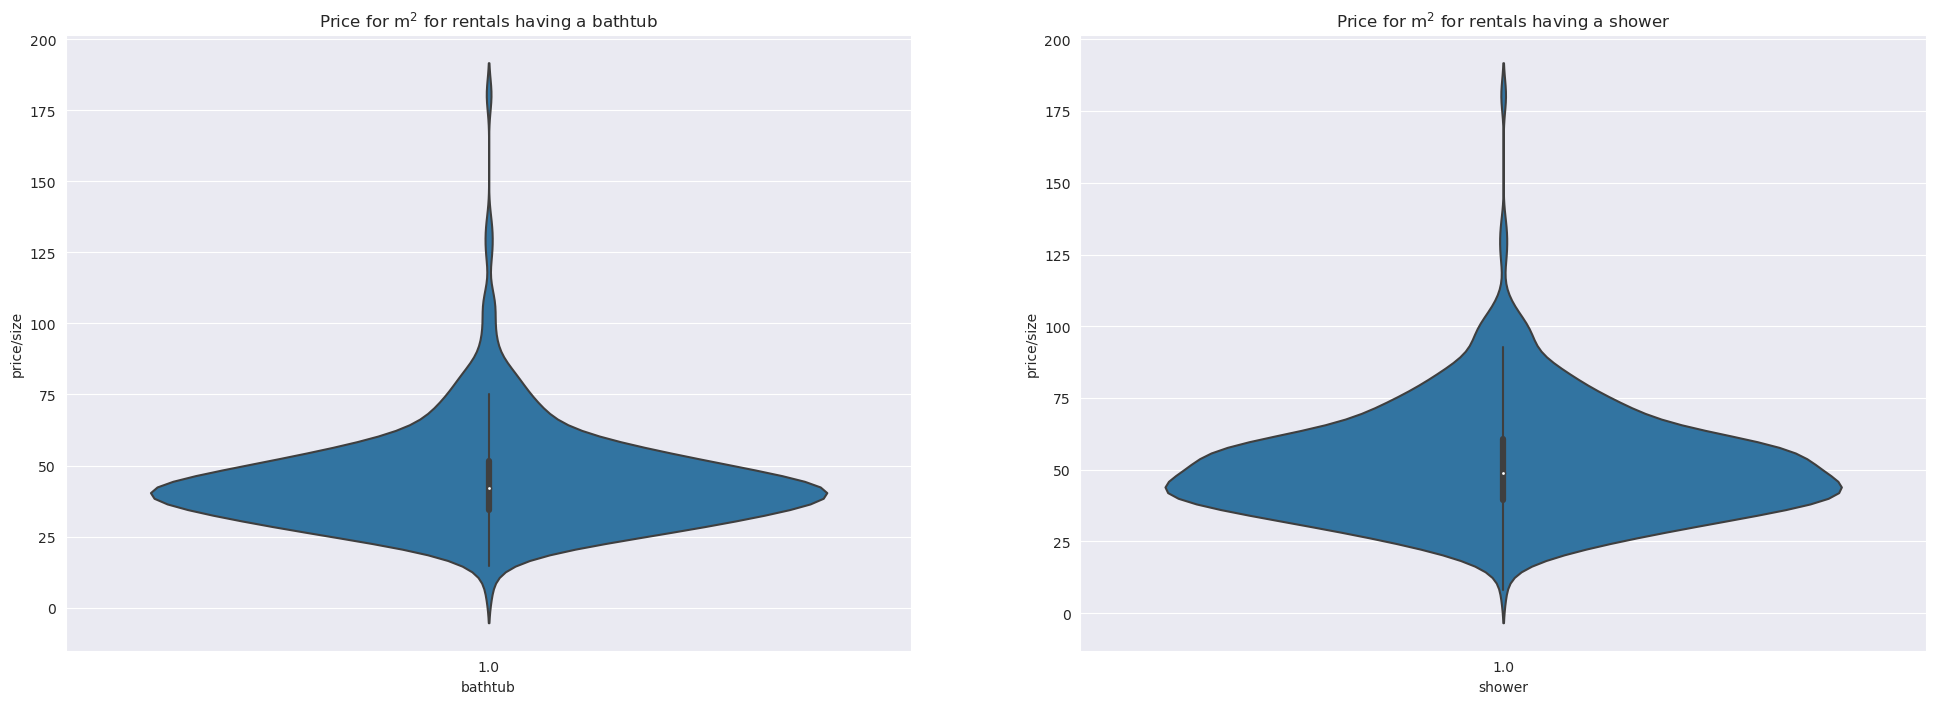

In [15]:
fig, ax = plt.subplots(ncols=2)
sns.violinplot(data=data, x='bathtub', y='price/size', ax=ax[0]).set_title('Price for m$^2$ for rentals having a bathtub')
sns.violinplot(data=data, x='shower', y='price/size', ax=ax[1]).set_title('Price for m$^2$ for rentals having a shower')

In [16]:
print('Mean built_year for rentals with a bathtub')
print('------------------------')
print(data.query('bathtub == 1')['built_year'].mean())

print('\nMean built_year for rentals with a shower')
print('------------------------')
print(data.query('shower == 1')['built_year'].mean())

Mean built_year for rentals with a bathtub
------------------------
1997.030303030303

Mean built_year for rentals with a shower
------------------------
2001.627659574468


#### On average, property listings with a shower are 4 years younger.

## Elevator

Text(0.5, 1.0, 'Price for m$^2$ for rentals with and without an elevator')

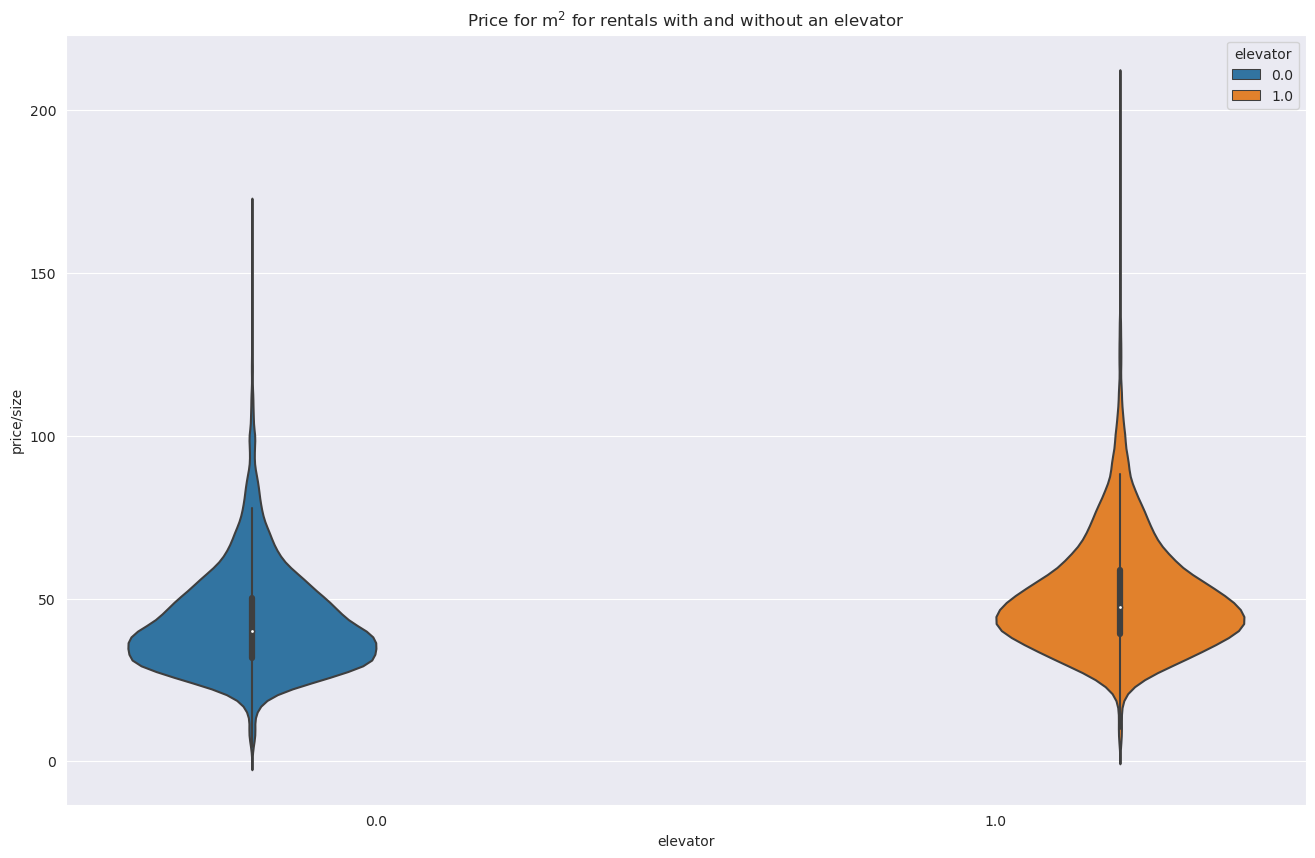

In [17]:
# There are a lot of Null values in the elevator column, they can be interpretted as a lack of elevator
plt.figure(figsize=(16,10))
elevator_data = data[['price/size', 'elevator', 'built_year']].copy()
elevator_data.loc[elevator_data['elevator'] != 1, 'elevator'] =0
sns.violinplot(data=elevator_data, x='elevator', y='price/size', hue='elevator').set_title('Price for m$^2$ for rentals with and without an elevator')

In [18]:
print('Mean built_year for rentals with elevator')
print('------------------------')
print(elevator_data.query('elevator == 1')['built_year'].mean())

print('\nMean built_year for rentals without elevator')
print('------------------------')
print(elevator_data.query('elevator == 0')['built_year'].mean())

Mean built_year for rentals with elevator
------------------------
2009.458001292268

Mean built_year for rentals without elevator
------------------------
1992.778335508483


## Furnished

Text(0.5, 1.0, 'Price for m$^2$ for furnished and unfurnished rentals')

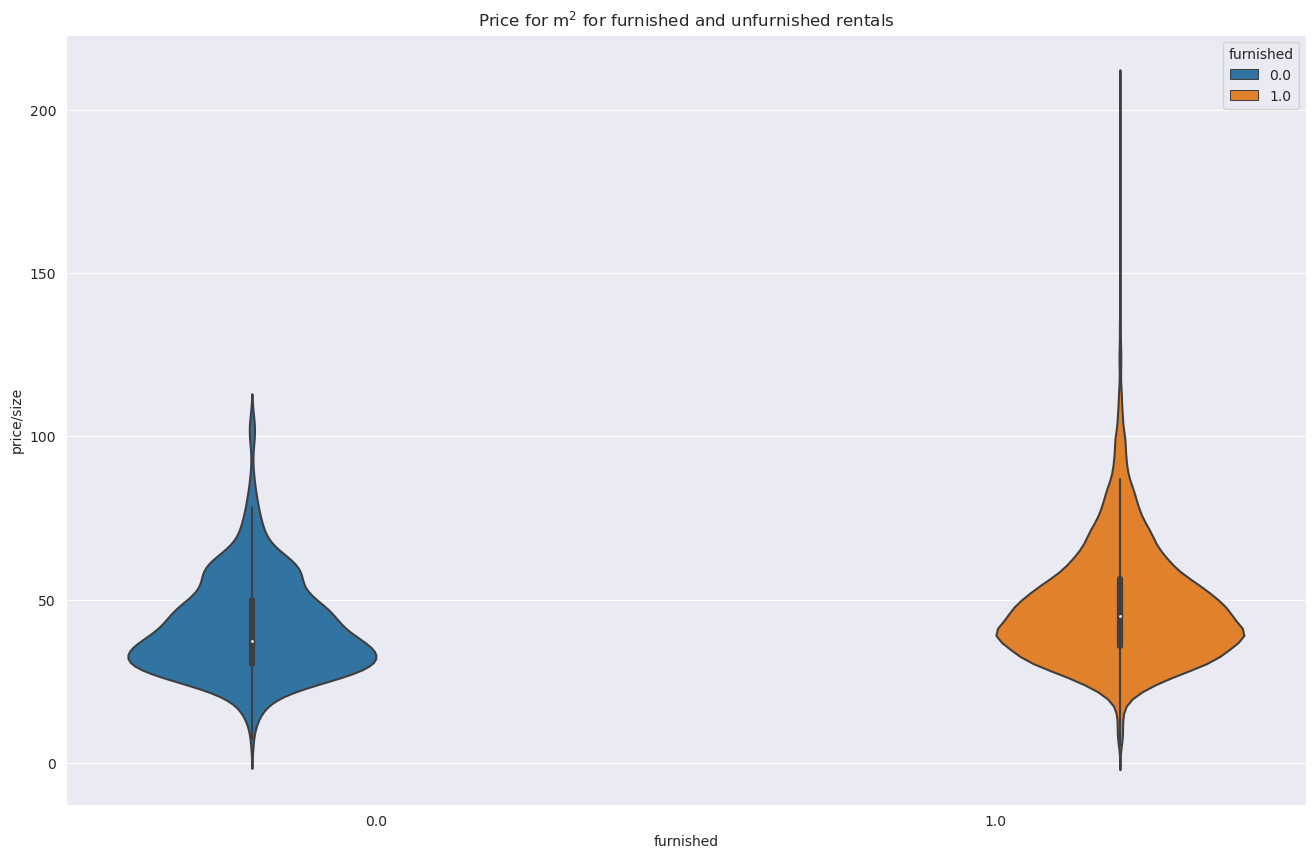

In [19]:
plt.figure(figsize=(16,10))
sns.violinplot(data=data, x='furnished', y='price/size', hue='furnished').set_title('Price for m$^2$ for furnished and unfurnished rentals')

## Offering

Text(0.5, 1.0, 'Ammont of each offering type')

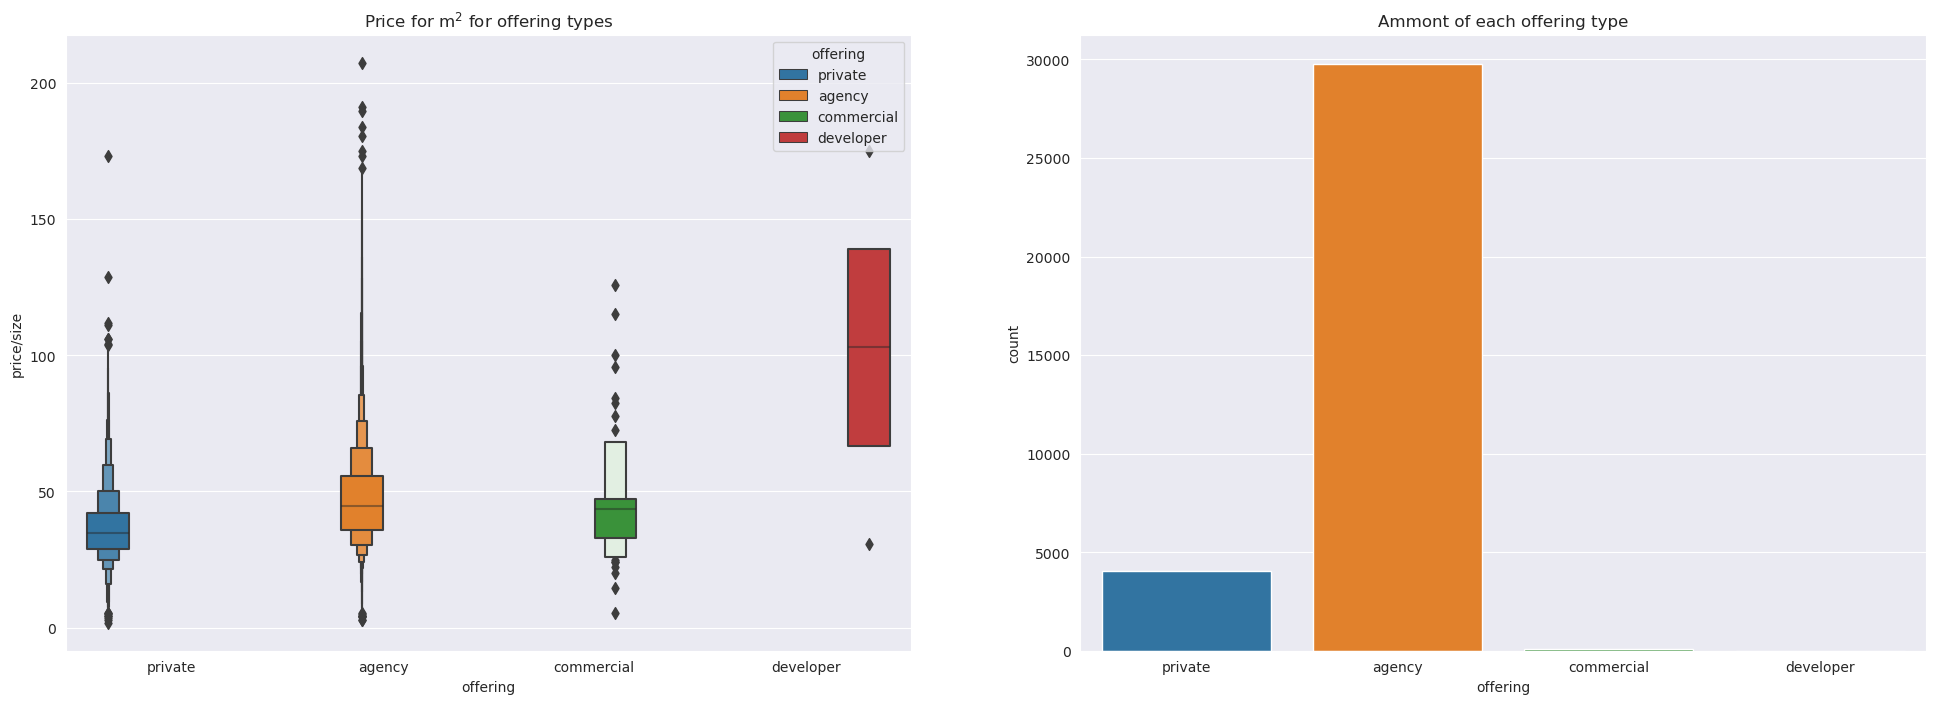

In [20]:
fig, ax = plt.subplots(ncols=2)
sns.boxenplot(data=data, x='offering', y='price/size', hue='offering', ax=ax[0]).set_title('Price for m$^2$ for offering types')
sns.countplot(data=data, x='offering', ax=ax[1]).set_title('Ammont of each offering type')

## Built_Year

In [21]:
print('Mean built_year')
print('------------------------')
data['built_year'].mean()

Mean built_year
------------------------


2000.8256871200706

Text(0.5, 1.0, 'Mean price for m$^2$ built year')

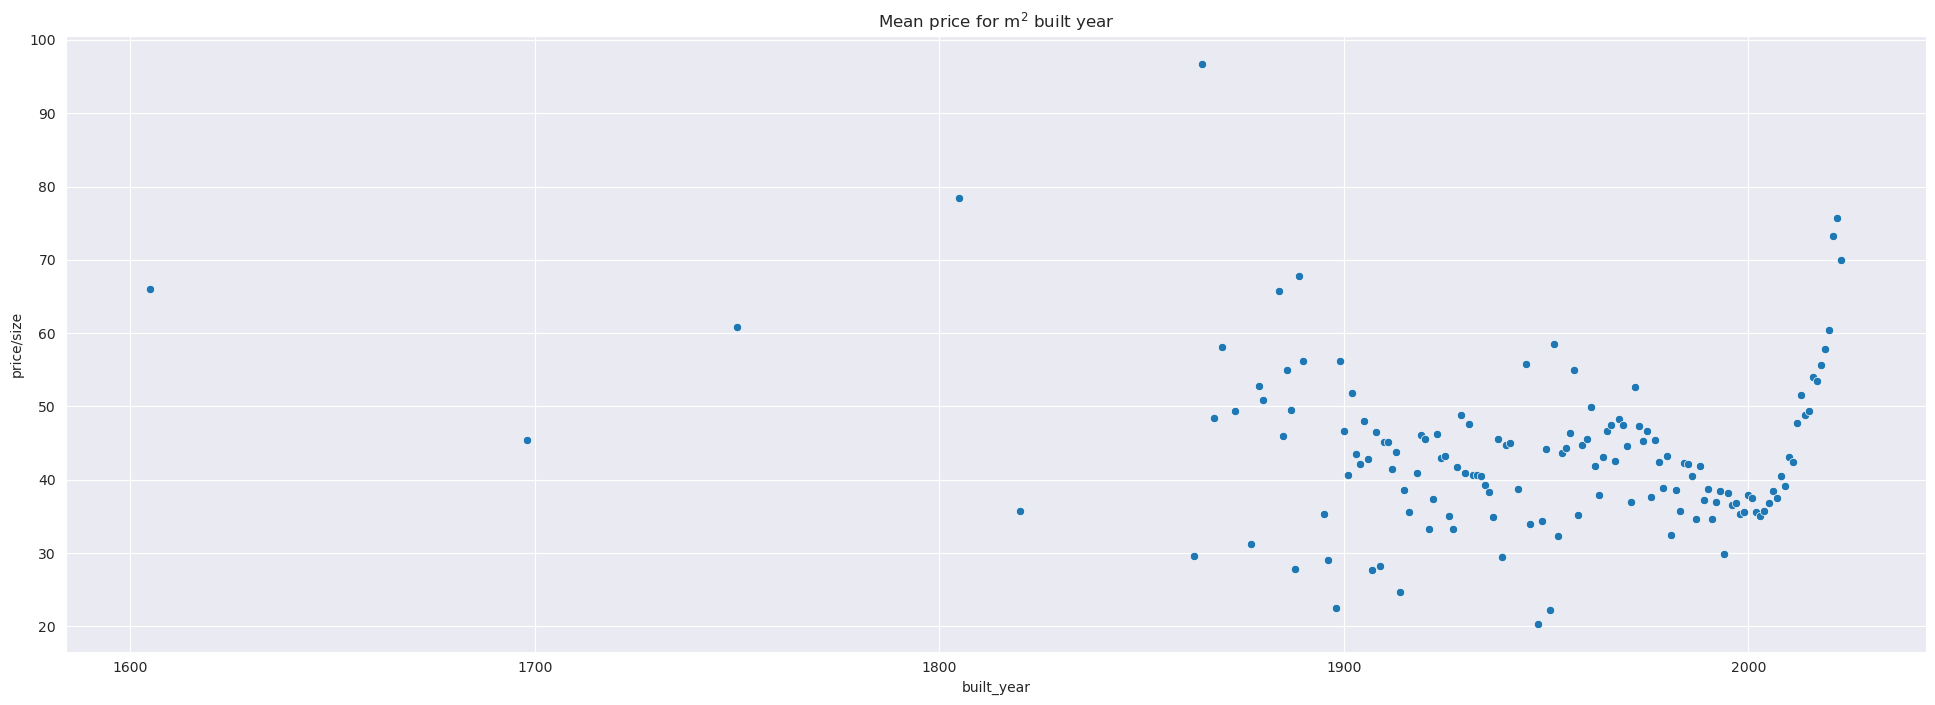

In [22]:
data_built_year = data[['built_year', 'price/size']].groupby('built_year').mean()
sns.scatterplot(data=data_built_year, x='built_year', y='price/size').set_title('Mean price for m$^2$ built year')

# Machine Learning

## Imports

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

## Dealing with some of the unwanted and missing data

In [24]:
# Creating a copy of the DataFrame
data_copy = data.copy()

# Removing unusable columns (lots of missing or many unique string values)
data_copy.drop(['street','subdivision', 'shower', 'bathtub', 'year_month'], axis=1, inplace=True)

full_data_shape = data_copy.shape[0]

# Removing rows with missing values for floor, rooms and borough columns
data_copy.dropna(subset=['floor', 'rooms', 'borough'], inplace=True)
print(f'{full_data_shape - data_copy.shape[0]} rows were removed')

2033 rows were removed


In [25]:
# Replacing missing bathrooms values with a rounded mean 
data_copy['bathrooms'].fillna(data_copy['bathrooms'].mean().round(), inplace=True)

In [26]:
# Replacing missing furnished values with 1 (True)
data_copy['furnished'].fillna(1, inplace=True)

# Replacing missing elevator values with 0 (False)
data_copy['elevator'].fillna(0, inplace=True)

# Replacing missing kichen_window values with 0 (False)
data_copy['kichen_window'].fillna(0, inplace=True)

# Replacing missing bathrooms_window values with 0 (False)
data_copy['bathroom_window'].fillna(0, inplace=True)

In [27]:
# Replacing all built_year values lower then 1975
data_copy['built_year'] = data_copy['built_year'].clip(1975, 2024)

In [28]:
# Replacing data_listed values with months diffrence from the most recent date (2023-06, days are excluded)

data_copy['date_listed'] = data_copy['date_listed'].dt.to_period('M')
data_copy['date_listed'] = ((2023 - data_copy['date_listed'].dt.year) * 12) + (6 - data_copy['date_listed'].dt.month)

In [29]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
price,31852.0,2366.625549,1284.192490,100.000000,1700.000000,2100.000000,2600.000000,19900.000000
size,31852.0,53.159347,21.461793,5.000000,40.000000,50.000000,60.000000,450.000000
price/size,31852.0,46.102042,16.917756,1.851852,34.285714,43.243243,54.347826,207.317073
balcony,31852.0,0.517142,0.499714,0.000000,0.000000,1.000000,1.000000,1.000000
juliet_balcony,31852.0,0.003265,0.057049,0.000000,0.000000,0.000000,0.000000,1.000000
basement,31852.0,0.186205,0.389278,0.000000,0.000000,0.000000,0.000000,1.000000
tarrace,31852.0,0.071801,0.258162,0.000000,0.000000,0.000000,0.000000,1.000000
loggia,31852.0,0.019088,0.136838,0.000000,0.000000,0.000000,0.000000,1.000000
yard,31852.0,0.022385,0.147934,0.000000,0.000000,0.000000,0.000000,1.000000
attic,31852.0,0.005431,0.073499,0.000000,0.000000,0.000000,0.000000,1.000000


In [30]:
print('Percent of missing values')
(data_copy.isnull().sum() / len(data_copy)) *100

Percent of missing values


price                    0.000000
size                     0.000000
price/size               0.000000
balcony                  0.000000
juliet_balcony           0.000000
basement                 0.000000
tarrace                  0.000000
loggia                   0.000000
yard                     0.000000
attic                    0.000000
floor                    0.000000
rooms                    0.000000
bathrooms                0.000000
state                   37.284943
building_type           71.778852
built_year              41.652016
elevator                 0.000000
furnished                0.000000
kichen_separate          0.000000
kichen_kichenette        0.000000
kichen_window            0.000000
separate_toilet_room     0.000000
bidet                    0.000000
bathroom_window          0.000000
offering                 0.000000
date_listed              0.000000
borough                  0.000000
dtype: float64

## Separating Data

In [31]:
# Separete target from predictions
y = data_copy.price
X = data_copy.drop(['price', 'price/size'], axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [32]:
# Identify categorical and numeric columns
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

# XGBRegressor model
# Parameters were chosen using GridSearchCV
xgb_model = XGBRegressor(booster='gbtree',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=7,
                         subsample=0.5)

# Bundle preprocessing and modeling code in pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb_model', xgb_model)
])

## Model fitting and predictions

In [33]:
# Fitting the model
xgb_pipeline.fit(X_train, y_train)

# Predicting and validating
preds = xgb_pipeline.predict(X_valid)

score = mean_absolute_error(y_valid, preds)
print(f'Mean absolute error: {score}')

Mean absolute error: 337.6346501194875


## Feature Importance plot

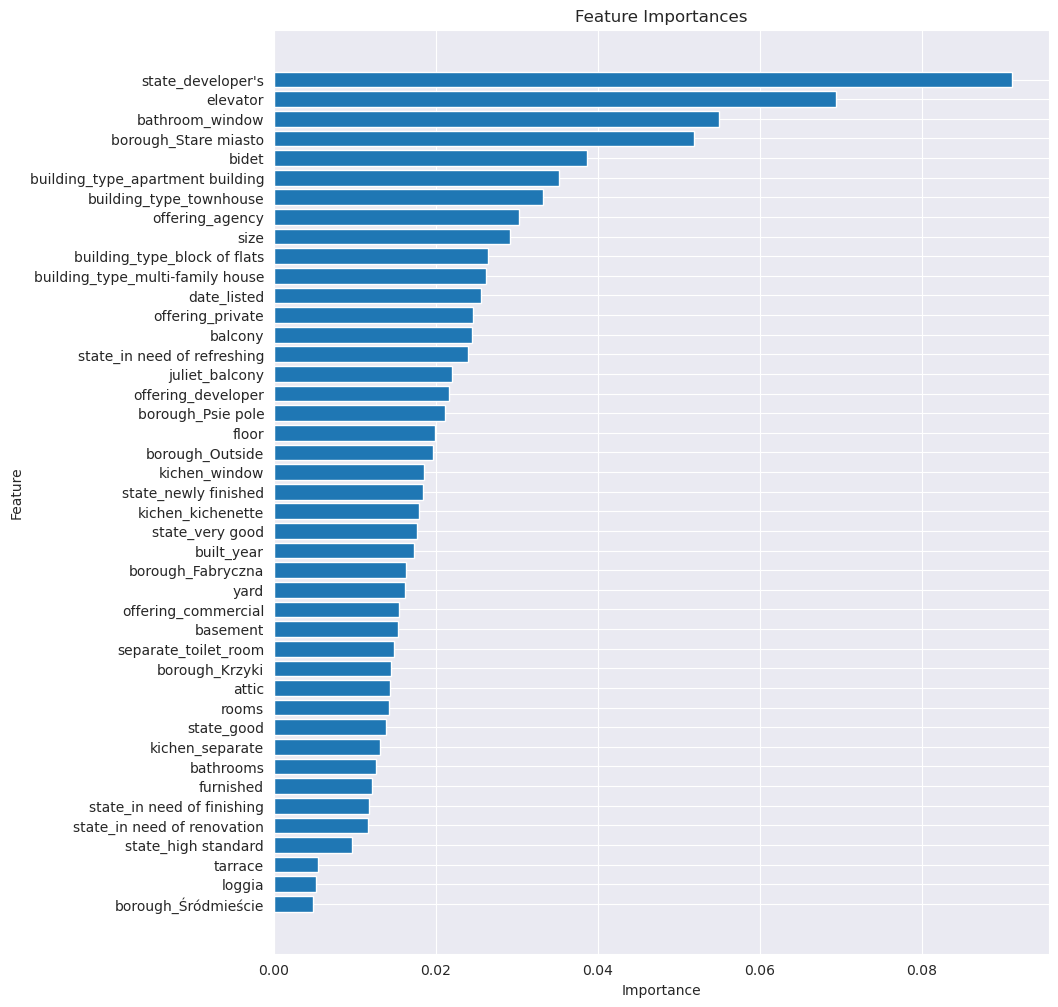

In [34]:
# Retrieve feature importances
importance_scores = xgb_pipeline.named_steps['xgb_model'].feature_importances_

# Retrieve categorical feature names after one-hot encoding
categorical_transformer = xgb_pipeline.named_steps['preprocessor'].transformers_[1][1]
onehot_encoder = categorical_transformer.named_steps['onehot']
categorical_feature_names = onehot_encoder.get_feature_names_out(categorical_cols)

# Combine feature names (categorical and numerical)
feature_names = np.concatenate([categorical_feature_names, numerical_cols])

# Sort feature importances and feature names in descending order
sorted_indices = np.argsort(importance_scores)[::1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 12))
ax.barh(sorted_feature_names, sorted_importance_scores)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importances')
plt.show()